
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


def sumatoria(x,n):
  suma_e=0
  for i in range(n):
    term1=(-1)**i
    numerador=x**i
    factorial=np.math.factorial(i)
    term2=term1*numerador/factorial
    suma_e +=term2

    #print(suma_e)
  return suma_e


sumatoria(5,15)

0.02445667144483013

In [ ]:
def sumatoria(x,n):
  suma_e=0
  for i in range(n):
    term1=(-1)**i
    numerador=x**i
    numerador2=(-x)**n
    factorial=np.math.factorial(i)
    term2=term1*numerador/factorial
    suma_e +=term2

    abs1=abs((-x)**(n+1)/np.math.factorial(n+1))
    abs2=abs(10**(-7)*numerador2/factorial)

    while abs1>abs2:
      return suma_e
      if abs1<=abs2:
        break


    #print(abs1,abs2)
  #return suma_e


sumatoria(1,36)

0.36787944117144245

In [ ]:
def sumatoria(x,n):
  suma_e=0
  for i in range(n):
    term1=(-1)**i
    numerador=x**i
    numerador2=(-x)**n
    factorial=np.math.factorial(i)
    term2=term1*numerador/factorial
    suma_e +=term2

    abs1 = abs((-x)**(i+1)/np.math.factorial(i+1))
    #abs2=abs(10**(-7)*numerador2/factorial)
    #print (abs1, abs(suma_e*10**(-7)))
    
    if (abs1<abs(suma_e*10**(-7))):
      
      return suma_e,abs1, i


  # while abs1<abs(suma_e*10**(-7)):
  #   return suma_e,abs1, n

  #    if suma_e*10**(-7)<=abs1:
  #      break


    #print(abs1,abs2)
  #return suma_e


sumatoria(1,200)

(0.3678794642857144, 2.505210838544172e-08, 10)

In [ ]:
#See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. 
#This eliminates subtractive cancellation, but does not eliminate all roundoff errors

def sumatoria(x,n):
  suma_e=0
  for i in range(n):
    #term1=(-1)**i
    numerador=x**i
    numerador2=(-x)**n
    factorial=np.math.factorial(i)
    term2=numerador/factorial
    suma_e +=term2


  return 1/suma_e
print('La diferencia entre ambos resultados es:', 0.3678794642857144-0.3678794411714423)

sumatoria(1,200)

La diferencia entre ambos resultados es: 2.3114272107438438e-08


0.3678794411714423

# **Cancelación substractiva**

In [ ]:
#Escribir un programa que realice el cálculo de  S(1)𝑁 ,  S(2)𝑁  y  S(3)𝑁

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#S(1)𝑁
N=1000000
def s1_n(n):
  suma1=0
  for i in range(1,2*N+1):
    #term1= (-1)**i
    #fraccion1= i/(i+1)
    #suma1 += term1*fraccion1
    suma1 +=(-1)**i * i/(i+1)
  return suma1

s1_n(200)



0.3068525694401464

In [ ]:
#S(2)𝑁


N=1000000
def s2_n(n):
  suma2=0
  for i in range(1,N+1):
    frac1= (-1)*(2*i-1)/(2*i)
    frac2= 2*i/(2*i+1)
    suma2 += frac1+frac2
  return suma2
s2_n(200)




0.3068525694401464

In [ ]:
#S(3)𝑁
N=1000000
def s3_n(n):
  suma3=0
  for i in range(1,N+1):
    suma3 += 1/(2*i*(2*i+1))
  return suma3

s3_n(200)







0.306852569440241

In [ ]:
#Estudiar la convergencia de la serie para los tres casos.
#Notemos que S(1)_N y S(2)_N convergen a el mismo punto, mientras que S(3)_N converge de manera distinta pero no muy alejada del los valores de las
#primeras dos sumatorias.

El intercepto en el eje Y es: 2.2355005759075246e-15 y la pendiente es: 1.0057484583394999e-17


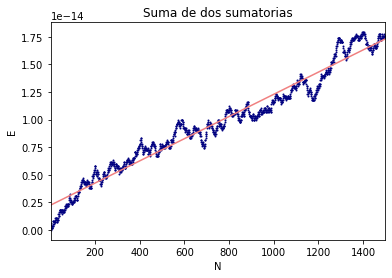

In [ ]:
N=1000000
def s1_s3(N):
  sum1_3=0
  sum3=0
  suma1=0
  for i in range (1, N+1):
    sum3 += 1/(2*i*(2*i+1))
  for m in range(1,2*N+1):
    suma1 +=(-1)**m * m/(m+1)
  
  sum1_3+=abs(suma1-sum3)/sum3
  return sum1_3 #sum1_3 es E

s1_s3(1)

n_values = list(range(1, 1500))

# Calcular los valores de la suma de las dos sumatorias para cada valor de n
s_values = [s1_s3(n) for n in n_values]

# Ajustar una línea a los datos
m, b = np.polyfit(n_values, s_values, 1)
intercepto = b
pendiente=m

plt.scatter(n_values, s_values, s=1, color='navy')
plt.plot(n_values, np.array(n_values)*m+b, color='lightcoral')
plt.xlabel('N')
plt.xlim(1,1500)
plt.ylabel('E')
plt.title('Suma de dos sumatorias')


print("El intercepto en el eje Y es:", intercepto, 'y la pendiente es:', pendiente)

plt.show()
#determinar intercepto y pendiente para escribir la taza de cremicimiento del error


Notemos que a simple vista, la mayoría de los datos no están tan alejados de la línea de ajuste de la gráfica anterior. Pero notemos que la pendiente "m"  es positiva, significa que la variable dependiente (E) aumenta a medida que la variable independiente (N) aumenta, esto significa que la tasa de error está aumentando a medida que se toman más "N" en la sumatoria, esto indicar que la sumatoria pierde precisión a medida que se suman más elementos.




El intercepto en el eje Y es: 0.9852051244738903 y la pendiente es: 1.3711459595555225e-05


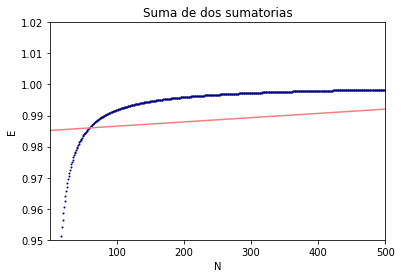

In [ ]:
N=1000000
def s2_s3(N):
  sum2_3=0
  sum3=0
  suma2=0
  for i in range (1, N+1):
    sum3 += 1/(2*i*(2*i+1))
  for m in range(1,N+1):
    frac1= (-1)*(2*i-1)/(2*i)
    frac2= 2*i/(2*i+1)
    suma2 += frac1+frac2
  
  sum2_3+=abs(suma2-sum3)/sum3
  return sum2_3 #sum2_3 es E

s2_s3(1)

n_values = list(range(1, 1500))

# Calcular los valores de la suma de las dos sumatorias para cada valor de n
s_values = [s2_s3(n) for n in n_values]

# Ajustar una línea a los datos
m, b = np.polyfit(n_values, s_values, 1)
intercepto = b
pendiente=m

plt.scatter(n_values, s_values, s=1, color='navy')
plt.plot(n_values, np.array(n_values)*m+b, color='lightcoral')

plt.xlabel('N')
plt.xlim(1,500)
plt.ylabel('E')
plt.ylim(0.95,1.02)
plt.title('Suma de dos sumatorias')


print("El intercepto en el eje Y es:", intercepto, 'y la pendiente es:', pendiente)

plt.show()
#determinar intercepto y pendiente para escribir la taza de cremicimiento del error

En este caso la disperción de los datos se ve mas ordenada. Pero notemos que la pendiente "m"  es positiva, significa que la variable dependiente (E) aumenta a medida que la variable independiente (N) aumenta. Aunque, aumenta menos drástico que el caso anterior.